In [1]:
%matplotlib inline 

In [ ]:
"""
Use this notebook to calculate some simple 2D score plots like those in the paper. Distance normalization should be applied carefully; using different combinations of accounting for distance (normalization) can make a big difference in certain distributions of points, depending on label composition and pairwise distances. You can use use_denominator_distance and normalize_distance to remove different terms from the score calculation formula to see how those affect the scaling of the scores.
"""

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import pairwise_distances

In [3]:
from score_calculation.border_scores import get_border_scores_precomputed_distance

In [4]:
def Generate_and_Split(examples_by_class, x_means, y_means,
                x_spreads, y_spreads, test_set_proportion=.1):

    lb = LabelBinarizer()

    X, y_flat = generate_dataset(examples_by_class, 
                    x_means, y_means, x_spreads, y_spreads)
    y = lb.fit_transform(y_flat)

    perm = np.random.permutation(X.shape[0])

    X = X[perm]
    y = y[perm]
    y_flat = y_flat[perm]
                    
    ts = int(math.floor(X.shape[0] * test_set_proportion))
    
    X_train = X[0:-1*(ts)]
    y_train = y[0:-1*(ts)]
    y_flat_train = y_flat[0:-1*(ts)]
    
    X_test = X[-1*ts:]
    y_test = y[-1*ts:]
    y_flat_test = y_flat[-1*ts:]

    return (X_train, y_train, y_flat_train,
            X_test, y_test, y_flat_test)

In [5]:
def generate_dataset(examples_by_class, x_means, y_means, x_spreads, y_spreads):
    X = []
    y = []

    for c in range(len(examples_by_class)):
            
        for i in range(examples_by_class[c]):
            x1 = np.random.normal(loc=x_means[c],scale=x_spreads[c])
            x2 = np.random.normal(loc=y_means[c],scale=y_spreads[c])
            
            X.append([x1,x2])
            y.append(c)
    
    X=np.array(X)
    y=np.array(y)
    
    return X, y

In [6]:
examples_by_class = [10,10,4]
x_means = [-1,1,0]
y_means = [1,1,-1]
x_spreads = [0.75,0.75,1.0]
y_spreads = [0.75,0.5,0.75]

In [27]:
def make_plot(X, y, intrts, threshold=0.75, xmin=-3, xmax=3, ymin=-2, ymax=3):

    min_dot_size = 40

    s = np.ones(len(X))
    s *= min_dot_size
    s = s + 80 * intrts

    markers = ["^","o","+"]
    colors = ["red","green","blue"]

    f, ax1 = plt.subplots(1, figsize=(5,4), dpi=80, sharex=True, sharey=True)
    f.tight_layout(rect=[0, 0.03, 1, 0.95])

    ax1.set_xlim([xmin,xmax])
    ax1.set_ylim([ymin,ymax])

    ticklines = ax1.get_xticklines() + ax1.get_yticklines()
    gridlines = ax1.get_xgridlines() + ax1.get_ygridlines()

    for line in gridlines:
        line.set_linestyle('-.')

    for line in ticklines:
        line.set_linewidth(3)

    classes = np.unique(y)

    for j in classes:
        class_j = y == j
        ax1.scatter(X[class_j][:,0], 
            X[class_j][:,1],
            c=colors[j],
            s=s[class_j],
            marker=markers[j])

    for i, bs in enumerate(intrts):
        bs = float(format(bs, '.2f'))
        if bs > threshold:
            ax1.annotate(bs, (X[i][0] + 0.05, X[i][1] + 0.05), size=12)

    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    
def plot_wrapper(X,y,k, 
                 use_numerator_distance=True, 
                 use_denominator_distance=True,
                 normalize_distance=True,
                 threshold=0.75, 
                 xmin=-3, xmax=3, ymin=-2, ymax=3
                ):
    D = pairwise_distances(X, metric="euclidean")
    bs = get_border_scores_precomputed_distance(y, D, k, use_numerator_distance=use_numerator_distance, 
                 use_denominator_distance=use_denominator_distance, normalize_distance=normalize_distance)
    
    make_plot(X, y, bs, threshold=threshold,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)

/data/matthew.almeida001/TKDDNBScore/notebooks/border_scores_n_class_fix.py:104: RuntimeWarning: divide by zero encountered in log2
  log_prob_class_c = np.where(prob_class_c > 0, np.log2(prob_class_c), 0)
/data/matthew.almeida001/TKDDNBScore/notebooks/border_scores_n_class_fix.py:120: RuntimeWarning: invalid value encountered in true_divide
  count_of_neighbors_of_class_c
/data/matthew.almeida001/TKDDNBScore/notebooks/border_scores_n_class_fix.py:125: RuntimeWarning: divide by zero encountered in true_divide
  avg_inv = np.divide(np.ones_like(avg_distance_to_class_c), avg_distance_to_class_c)
/data/matthew.almeida001/TKDDNBScore/notebooks/border_scores_n_class_fix.py:168: RuntimeWarning: invalid value encountered in true_divide
  np.divide(numerator, denominator),


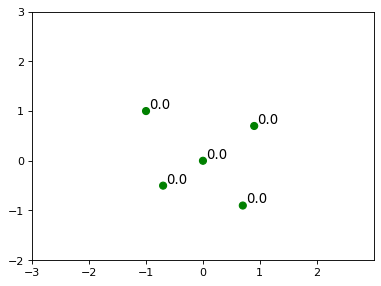

In [64]:
k=5

X = np.array([
    [0,0],
    [-0.7,-0.5],
    [-1.0, 1.0],
    [0.9,0.7],
    [0.7,-0.9],
])

y = np.array([
      1,1,1,1,1
])

plot_wrapper(X, y, k, threshold=-0.1)

/data/matthew.almeida001/TKDDNBScore/notebooks/border_scores_n_class_fix.py:125: RuntimeWarning: divide by zero encountered in true_divide
  avg_inv = np.divide(np.ones_like(avg_distance_to_class_c), avg_distance_to_class_c)


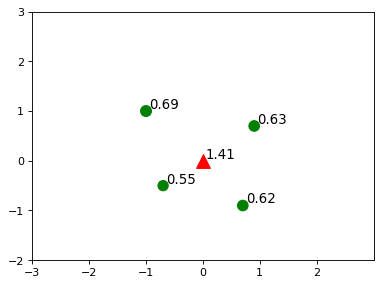

In [14]:
k=5


X = np.array([
    [0,0],
    [-0.7,-0.5],
    [-1.0, 1.0],
    [0.9,0.7],
    [0.7,-0.9],
])

y = np.array([
      0,1,1,1,1
])

D = pairwise_distances(X, metric="euclidean")
bs = get_border_scores_precomputed_distance(y, D, k)
intrs = get_interest_values(X,y,k)

fucking_plot(X, y, bs, threshold=0.5)

(1)  A sample should have score 0 when all k − 1 neighbors are of the same class as the sample.

Check. Currently included in paper.

(2)  Examples in highly heterogeneous neighborhoods (i.e., neighborhoods with a high number of classes present)
should have higher scores than points in homogeneous neighborhoods consisting of mostly their own class, but
lower scores than points in homogeneous neighborhoods consisting of points of mostly another class.

Check. See example below.

(3)  Examples in relatively dense neighborhoods should have higher scores than points in relatively sparse neighborhoods, with label composition held constant.



/data/matthew.almeida001/TKDDNBScore/notebooks/border_scores_n_class_fix.py:125: RuntimeWarning: divide by zero encountered in true_divide
  avg_inv = np.divide(np.ones_like(avg_distance_to_class_c), avg_distance_to_class_c)


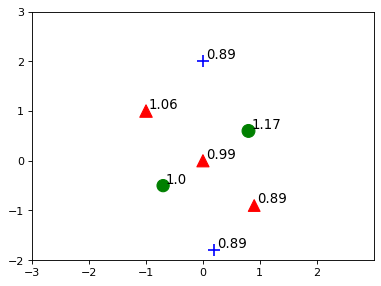

In [60]:
# Point 2 above.

k=6

X = np.array([
    [0,0],
    [-0.7,-0.5],
    [-1.0, 1.0],
    [0.8,0.6],
    [0.9,-0.9],
    [0.2,-1.8],
    [0,2.0]
])


y = np.array([
     0,1,0,1,0,2,2
])

plot_wrapper(X, y, k, use_denominator_distance=False, normalize_distance=True, threshold=0.5)

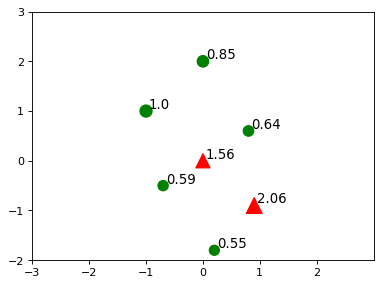

In [61]:
y = np.array([
     0,1,1,1,0,1,1
])

plot_wrapper(X, y, k, use_denominator_distance=False, normalize_distance=True, threshold=0.5)

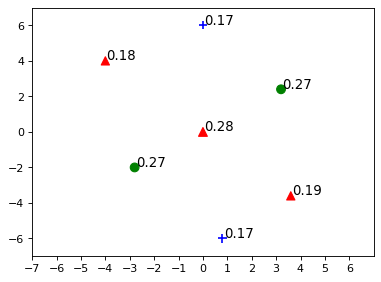

In [58]:
# Point 3 above.

k=7
a=4

X = np.array([
    [0,0],
    [-0.7,-0.5],
    [-1.0, 1.0],
    [0.8,0.6],
    [0.9,-0.9],
    [0.2,-1.5],
    [0,1.5]
])


y = np.array([
     0,1,0,1,0,2,2
])

Z = a*X

plot_wrapper(Z, y, k, use_denominator_distance=False, normalize_distance=False, threshold=0.0,
            xmin=np.min(Z)-1.0,xmax=np.max(Z)+1.0,ymin=np.min(Z)-1.0,ymax=np.max(Z)+1.0)

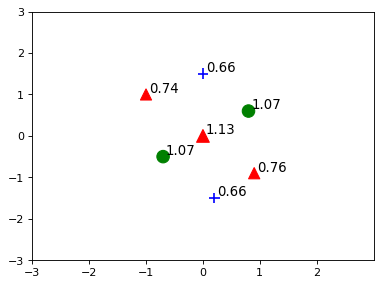

In [59]:
plot_wrapper(X, y, k, use_denominator_distance=False, normalize_distance=False, ymin=-3, threshold=0.0)

In [41]:
X[:,0] + 1

array([1. , 0.3, 0. , 1.8, 1.9, 1.2, 1. ])

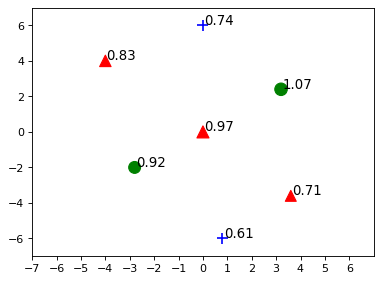

In [29]:
plot_wrapper(Z, y, k, use_denominator_distance=False, normalize_distance=True, threshold=0.0,
            xmin=np.min(Z)-1.0,xmax=np.max(Z)+1.0,ymin=np.min(Z)-1.0,ymax=np.max(Z)+1.0)